In this assignment, we will run ridge regression multiple times with different L2 penalties to see which one produces the best fit. We will revisit the example of polynomial regression as a means to see the effect of L2 regularization. In particular, we will:

* Use a pre-built implementation of regression to run polynomial regression
* Use matplotlib to visualize polynomial regressions
* Use a pre-built implementation of regression to run polynomial regression, this time with L2 penalty
* Use matplotlib to visualize polynomial regressions under L2 regularization
* Choose best L2 penalty using cross-validation.
* Assess the final fit using test data.
* We will continue to use the House data from previous assignments. (In the next programming assignment for this   
  module, you will implement your own ridge regression learning algorithm using gradient descent.)

In [3]:
import graphlab

1. Copy and paste an equivalent of ‘polynomial_sframe’ function from Module 3 (Polynomial Regression). This function accepts an array ‘feature’ (of type pandas.Series) and a maximal ‘degree’ and returns an data frame (of type pandas.DataFrame) with the first column equal to ‘feature’ and the remaining columns equal to ‘feature’ to increasing integer powers up to ‘degree’.

In [5]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = graphlab.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_sframe[name] to be feature^power
            poly_sframe[name] = poly_sframe['power_1'].apply(lambda x, power=power : x**power)
    return poly_sframe

2. For the remainder of the assignment we will be working with the house Sales data as in Module 3 (Polynomial Regression). Load in the data and also sort the sales data frame by ‘sqft_living’. When we plot the fitted values we want to join them up in a line and this works best if the variable on the X-axis (which will be ‘sqft_living’) is sorted. For houses with identical square footage, we break the tie by their prices.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
sales = graphlab.SFrame('kc_house_data.gl/')
sales = sales.sort(['sqft_living', 'price'])

3. Let us revisit the 15th-order polynomial model using the 'sqft_living' input. Generate polynomial features up to degree 15 using `polynomial_sframe()` and fit a model with these features. When fitting the model, use an L2 penalty of 1.5e-5:

In [7]:
l2_small_penalty = 1.5e-5

In [9]:
# With the L2 penalty specified above, fit the model and print out the learned weights.
# Add "alpha=l2_small_penalty" and "normalize=True" to the parameter list of linear_model.Ridge:
poly15_data = polynomial_sframe(sales['sqft_living'], 15)
poly15_data['price'] = sales['price']

In [10]:
poly15_data.head()

power_1,power_2,power_3,power_4,power_5,power_6,power_7
290.0,84100.0,24389000.0,7072810000.0,2.0511149e+12,5.94823321e+14,1.7249876309e+17
370.0,136900.0,50653000.0,18741610000.0,6.9343957e+12,2.565726409e+15,9.4931877133e+17
380.0,144400.0,54872000.0,20851360000.0,7.9235168e+12,3.010936384e+15,1.14415582592e+18
384.0,147456.0,56623104.0,21743271936.0,8.34941642342e+12,3.20617590659e+15,1.23117154813e+18
390.0,152100.0,59319000.0,23134410000.0,9.0224199e+12,3.518743761e+15,1.37231006679e+18
390.0,152100.0,59319000.0,23134410000.0,9.0224199e+12,3.518743761e+15,1.37231006679e+18
410.0,168100.0,68921000.0,28257610000.0,1.15856201e+13,4.750104241e+15,1.94754273881e+18
420.0,176400.0,74088000.0,31116960000.0,1.30691232e+13,5.489031744e+15,2.30539333248e+18
420.0,176400.0,74088000.0,31116960000.0,1.30691232e+13,5.489031744e+15,2.30539333248e+18
430.0,184900.0,79507000.0,34188010000.0,1.47008443e+13,6.321363049e+15,2.71818611107e+18


In [13]:
model = graphlab.linear_regression.create(poly15_data, target='price', features=['power_1'],
                                          l2_penalty=l2_small_penalty,
                                          validation_set=None, verbose=False)

### 4. Quiz Question: What’s the learned value for the coefficient of feature power_1?

In [14]:
model.coefficients

name,index,value,stderr
(intercept),None,-43580.7378445,4402.68969741
power_1,None,280.62356544,1.93639855512


## Observe overfitting
5. Recall from Week 3 that the polynomial fit of degree 15 changed wildly whenever the data changed. In particular, when we split the sales data into four subsets and fit the model of degree 15, the result came out to be very different for each subset. The model had a high variance. We will see in a moment that ridge regression reduces such variance. But first, we must reproduce the experiment we did in Week 3.

First, split the data into split the sales data into four subsets of roughly equal size and call them set_1, set_2, set_3, and set_4. Use .random_split function and make sure you set seed=0.

In [15]:
(tmp_1, tmp_2) = sales.random_split(0.5, seed=0)
(set_1, set_2) = tmp_1.random_split(0.5, seed=0)
(set_3, set_4) = tmp_2.random_split(0.5, seed=0)

6. Next, fit a 15th degree polynomial on set_1, set_2, set_3, and set_4, using 'sqft_living' to predict prices. Print the weights and make a plot of the resulting model.

In [16]:
poly15_set_1 = polynomial_sframe(set_1['sqft_living'], 15); poly15_set_1['price'] = set_1['price']
poly15_set_2 = polynomial_sframe(set_2['sqft_living'], 15); poly15_set_2['price'] = set_2['price']
poly15_set_3 = polynomial_sframe(set_3['sqft_living'], 15); poly15_set_3['price'] = set_3['price']
poly15_set_4 = polynomial_sframe(set_4['sqft_living'], 15); poly15_set_4['price'] = set_4['price']

In [20]:
model15_set_1 = graphlab.linear_regression.create(poly15_set_1, target = 'price', features = ['power_1', 'power_2','power_3','power_4','power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15'], l2_penalty=l2_small_penalty, validation_set = None, verbose = False)
model15_set_2 = graphlab.linear_regression.create(poly15_set_2, target = 'price', features = ['power_1', 'power_2','power_3','power_4','power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15'], l2_penalty=l2_small_penalty, validation_set = None, verbose = False)
model15_set_3 = graphlab.linear_regression.create(poly15_set_3, target = 'price', features = ['power_1', 'power_2','power_3','power_4','power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15'], l2_penalty=l2_small_penalty, validation_set = None, verbose = False)
model15_set_4 = graphlab.linear_regression.create(poly15_set_4, target = 'price', features = ['power_1', 'power_2','power_3','power_4','power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15'], l2_penalty=l2_small_penalty, validation_set = None, verbose = False)

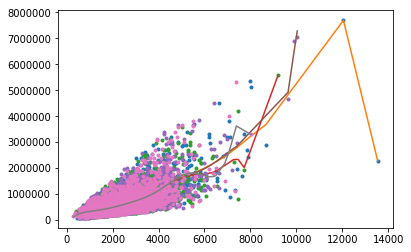

In [22]:
# model15_set_1
plt.plot(poly15_set_1['power_1'],poly15_set_1['price'],'.',
poly15_set_1['power_1'], model15_set_1.predict(poly15_set_1),'-')
# model15_set_2
plt.plot(poly15_set_2['power_1'],poly15_set_2['price'],'.',
poly15_set_2['power_1'], model15_set_2.predict(poly15_set_2),'-')
# model15_set_3
plt.plot(poly15_set_3['power_1'],poly15_set_3['price'],'.',
poly15_set_3['power_1'], model15_set_3.predict(poly15_set_3),'-')
# model15_set_4
plt.plot(poly15_set_4['power_1'],poly15_set_4['price'],'.',
poly15_set_4['power_1'], model15_set_4.predict(poly15_set_4),'-')

### 8. Quiz Question: For the models learned in each of these training sets, what are the smallest and largest values you learned for the coefficient of feature power_1? (For the purpose of answering this question, negative numbers are considered "smaller" than positive numbers. So -5 is smaller than -3, and -3 is smaller than 5 and so forth.)

In [28]:
print model15_set_1.coefficients['value'][1]
print model15_set_2.coefficients['value'][1]
print model15_set_3.coefficients['value'][1]
print model15_set_4.coefficients['value'][1]

608.61465132
673.934728858
-681.700050651
1250.93134331


## Ridge Regression

9. Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights. (Weights of model15 looked quite small, but they are not that small because 'sqft_living' input is in the order of thousands.)

10. With the argument l2_penalty=1e5, fit a 15th-order polynomial model on set_1, set_2, set_3, and set_4. Other than the change in the l2_penalty parameter, the code should be the same as the experiment above. Also, make sure GraphLab Create doesn't create its own validation set by using the option validation_set = None in this call.

In [30]:
l2_penalty=1e5

In [31]:
model15_set_1 = graphlab.linear_regression.create(poly15_set_1, target = 'price', features = ['power_1', 'power_2','power_3','power_4','power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15'], l2_penalty=l2_penalty, validation_set = None, verbose = False)
model15_set_2 = graphlab.linear_regression.create(poly15_set_2, target = 'price', features = ['power_1', 'power_2','power_3','power_4','power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15'], l2_penalty=l2_penalty, validation_set = None, verbose = False)
model15_set_3 = graphlab.linear_regression.create(poly15_set_3, target = 'price', features = ['power_1', 'power_2','power_3','power_4','power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15'], l2_penalty=l2_penalty, validation_set = None, verbose = False)
model15_set_4 = graphlab.linear_regression.create(poly15_set_4, target = 'price', features = ['power_1', 'power_2','power_3','power_4','power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15'], l2_penalty=l2_penalty, validation_set = None, verbose = False)

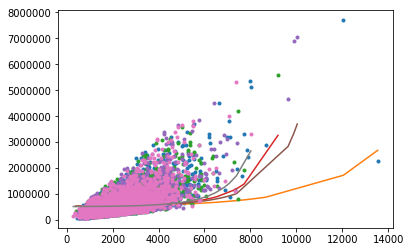

In [32]:
# model15_set_1
plt.plot(poly15_set_1['power_1'],poly15_set_1['price'],'.',
poly15_set_1['power_1'], model15_set_1.predict(poly15_set_1),'-')
# model15_set_2
plt.plot(poly15_set_2['power_1'],poly15_set_2['price'],'.',
poly15_set_2['power_1'], model15_set_2.predict(poly15_set_2),'-')
# model15_set_3
plt.plot(poly15_set_3['power_1'],poly15_set_3['price'],'.',
poly15_set_3['power_1'], model15_set_3.predict(poly15_set_3),'-')
# model15_set_4
plt.plot(poly15_set_4['power_1'],poly15_set_4['price'],'.',
poly15_set_4['power_1'], model15_set_4.predict(poly15_set_4),'-')

### 11. QUIZ QUESTION: For the models learned with regularization in each of these training sets, what are the smallest and largest values you learned for the coefficient of feature power_1? (For the purpose of answering this question, negative numbers are considered "smaller" than positive numbers. So -5 is smaller than -3, and -3 is smaller than 5 and so forth.)

In [33]:
print model15_set_1.coefficients
print model15_set_1.coefficients['value'][1]
print model15_set_2.coefficients['value'][1]
print model15_set_3.coefficients['value'][1]
print model15_set_4.coefficients['value'][1]

+-------------+-------+-------------------+-------------------+
|     name    | index |       value       |       stderr      |
+-------------+-------+-------------------+-------------------+
| (intercept) |  None |   530317.024516   |   1890090.19151   |
|   power_1   |  None |   2.58738875673   |   9034.21455077   |
|   power_2   |  None |  0.00127414400592 |    18.000330944   |
|   power_3   |  None | 1.74934226932e-07 |   0.019765845458  |
|   power_4   |  None | 1.06022119097e-11 | 1.33158533722e-05 |
|   power_5   |  None | 5.42247604482e-16 | 5.77475960841e-09 |
|   power_6   |  None | 2.89563828343e-20 | 1.63140263499e-12 |
|   power_7   |  None | 1.65000666351e-24 | 2.91195278612e-16 |
|   power_8   |  None | 9.86081528409e-29 | 2.85000603886e-20 |
|   power_9   |  None | 6.06589348254e-33 |        nan        |
+-------------+-------+-------------------+-------------------+
[16 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, n

## Selecting an L2 penalty via cross-validation

12. Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves fewer observations available for training. Cross-validation seeks to overcome this issue by using all of the training set in a smart way.

We will implement a kind of cross-validation called k-fold cross-validation. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

* Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation 
  set
* Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation 
  set
* ...
* Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this 
  validation set

After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that all observations are used for both training and validation, as we iterate over segments of data.

In [85]:
(train_valid, test) = sales.random_split(.9, seed=1)
train_valid_shuffled = graphlab.toolkits.cross_validation.shuffle(train_valid, random_seed=1)
print type(train_valid_shuffled)

<class 'graphlab.data_structures.sframe.SFrame'>


In [46]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in xrange(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print i, (start, end)

0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)


In [149]:
def _k_groups(all_data, num_folds):
    n = len(all_data)
    k = num_folds
    
    for i in xrange(k):
        start = (n*i)/k
        end = (n*(i+1))/k
        yield i,start,end

def k_groups(all_data, segment, num_folds):
    train = None
    valid = None
    for i,start,end in _k_groups(all_data, num_folds):
        if (i == segment):
            valid = all_data[start: end]
        elif train is None:
            train = all_data[start: end]
        else:
            train = train.append( all_data[start: end] )
    return train, valid

In [145]:
# Now let us extract individual segments with array slicing. Consider the scenario
# where we group the houses in the train_valid_shuffled dataframe into k=10 segments
# of roughly equal size, with starting and ending indices computed as above. Extract
# the fourth segment (segment 3) and assign it to a variable called validation4
validation4 = train_valid_shuffled[5818: 7757+1]

In [146]:
# To verify that we have the right elements extracted, run the following cell, which
# computes the average price of the fourth segment. When rounded to nearest whole number,
# the average should be $536,234.
print int(round(validation4['price'].mean(), 0))

536234


In [150]:
# After designating one of the k segments as the validation set, we train a model using
# the rest of the data. To choose the remainder, we slice (0:start) and (end+1:n) of the
# data and paste them together. SFrame has append() method that pastes together two disjoint
# sets of rows originating from a common dataset.
train4,_ = k_groups(train_valid_shuffled, 3, 10)

In [143]:
# To verify that we have the right elements extracted, run the following cell,
# which computes the average price of the data with fourth segment excluded.
# When rounded to nearest whole number, the average should be $539,450.
print int(round(train4['price'].mean(), 0))

539450


Now we are ready to implement k-fold cross-validation. Write a function that computes k validation errors by designating each of the k segments as the validation set. It accepts as parameters (i) k, (ii) l2_penalty, (iii) dataframe, (iv) name of output column (e.g. price) and (v) list of feature names. The function returns the average validation error using k segments as validation sets.

* For each i in [0, 1, ..., k-1]:
    * Compute starting and ending indices of segment i and call 'start' and 'end'
    * Form validation set by taking a slice (start:end+1) from the data.
    * Form training set by appending slice (end+1:n) to the end of slice (0:start).
    * Train a linear model using training set just formed, with a given l2_penalty
    * Compute validation error using validation set just formed

In [153]:
def k_fold_cross_validation(K, l2_penalty, data, output_name, features_list):
    avg = 0
    RSS = lambda rmse, n: n*RMSE*RMSE
    for k in xrange(K):
        train,valid = k_group(data, k, K)
        
        model = graphlab.linear_regression.create(train,
                                                  target=output_name,
                                                  features=features_list,
                                                  l2_penalty=l2_penalty,
                                                  validation_set=None,
                                                  verbose=False)
        
        avg = RSS(model.evaluate(valid)['rmse'], len(valid))

    return avg / K

Once we have a function to compute the average validation error for a model, we can write a loop to find the model that minimizes the average validation error. Write a loop that does the following:

* We will again be aiming to fit a 15th-order polynomial model using the sqft_living input
    * For l2_penalty in [10^1, 10^1.5, 10^2, 10^2.5, ..., 10^7] (to get this in Python, you can use this Numpy function: np.logspace(1, 7, num=13).)
Run 10-fold cross-validation with l2_penalty
Report which L2 penalty produced the lowest average validation error.
Note: since the degree of the polynomial is now fixed to 15, to make things faster, you should generate polynomial features in advance and re-use them throughout the loop. Make sure to use train_valid_shuffled when generating polynomial features!